#**Import Libraries**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")

# **Visualization Template**

In [137]:
sns.set_theme(style="darkgrid")
sns.set_palette("Set2")               # Palette for Seaborn plots
def plot_scatter(x, y, xlabel, ylabel, title, color=None, hue=None):
    plt.figure(figsize=(8,5))
    if hue:
        sns.scatterplot(x=x, y=y, hue=hue, palette="Set2", alpha=0.7)
    else:
        plt.scatter(x, y, color=color if color else 'teal', alpha=0.7)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()
def plot_residuals(y_true, y_pred, model_name, color=None):
    residuals = y_true - y_pred
    plt.figure(figsize=(8,5))
    plt.scatter(y_pred, residuals, color=color if color else 'orange', alpha=0.6)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
    plt.xlabel('Predicted Price', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.title(f'Residuals Plot: {model_name}', fontsize=14)
    plt.show()


In [138]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')

#**Data Understanding**

In [139]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [140]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [142]:
df.shape

(205, 26)

In [143]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [144]:
df.duplicated().sum()

np.int64(0)

# **EDA & Data Cleaning**

In [145]:
df_clean=df.copy()

In [146]:
df_clean.drop("car_ID", axis=1, inplace=True)

In [147]:
df_clean.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Cleaning 'CarName' column

In [148]:
df_clean["CarName"].values

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)', 'bmw 320i', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'bmw x3', 'chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda civic', 'honda accord cvcc',
       'honda civic cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda accord', 'honda civic', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'isuzu D-Max ', 'jaguar xj',
       'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc delux

In [149]:
#Extracted brand name from full car name
df_clean['CarBrand'] = df_clean['CarName'].apply(lambda x: x.split()[0].lower())

In [150]:
df_clean['CarBrand'].replace({
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'porcshce': 'porsche',
    'maxda': 'mazda'
}, inplace=True)

In [151]:
df_clean.drop('CarName', axis=1, inplace=True)

In [152]:
df_clean["CarBrand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Exploring 'symboling' column

In [153]:
#Values range from -2 to 3
# No missing values
df_clean["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2])

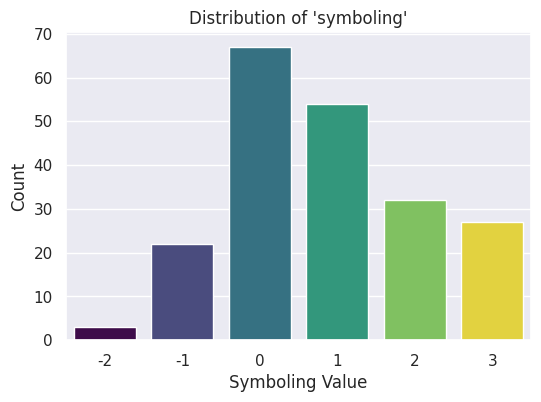

In [154]:
# Visualization of 'symboling' distribution
plt.figure(figsize=(6,4))
sns.countplot(x='symboling', data=df_clean, hue='symboling', palette='viridis', legend=False)
plt.title("Distribution of 'symboling'")
plt.xlabel("Symboling Value")
plt.ylabel("Count")
plt.show()

# Exploring Categorical Columns

**'fueltype' column**

In [155]:
df_clean['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [202]:
df_clean['fueltype'].value_counts()

,count
fueltype,
gas,185
diesel,20


**'aspiration' column**

In [157]:
df_clean["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [158]:
df['aspiration'].value_counts()

,count
aspiration,
std,168
turbo,37


Column 'aspiration' explored: 'std' is more frequent than 'turbo'.

Ready for encoding in the preprocessing stage.

**cleaning 'doornumber' column**

In [159]:
df_clean['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [160]:
df_clean['doornumber'].value_counts()

,count
doornumber,
four,115
two,90


In [161]:
# Map 'two' to 2 and 'four' to 4
df_clean['doornumber'] = df_clean['doornumber'].map({'two': 2, 'four': 4})

**'carbody' column**

In [162]:
df_clean['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [163]:
df_clean['carbody'].value_counts()

,count
carbody,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


**'drivewheel' column**

In [164]:
df_clean['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [165]:
df_clean['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


**'enginelocation' column**

In [166]:
df_clean['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [167]:
df_clean['enginelocation'].value_counts()

,count
enginelocation,
front,202
rear,3


# Handling Outliers Using Capping (IQR Method)

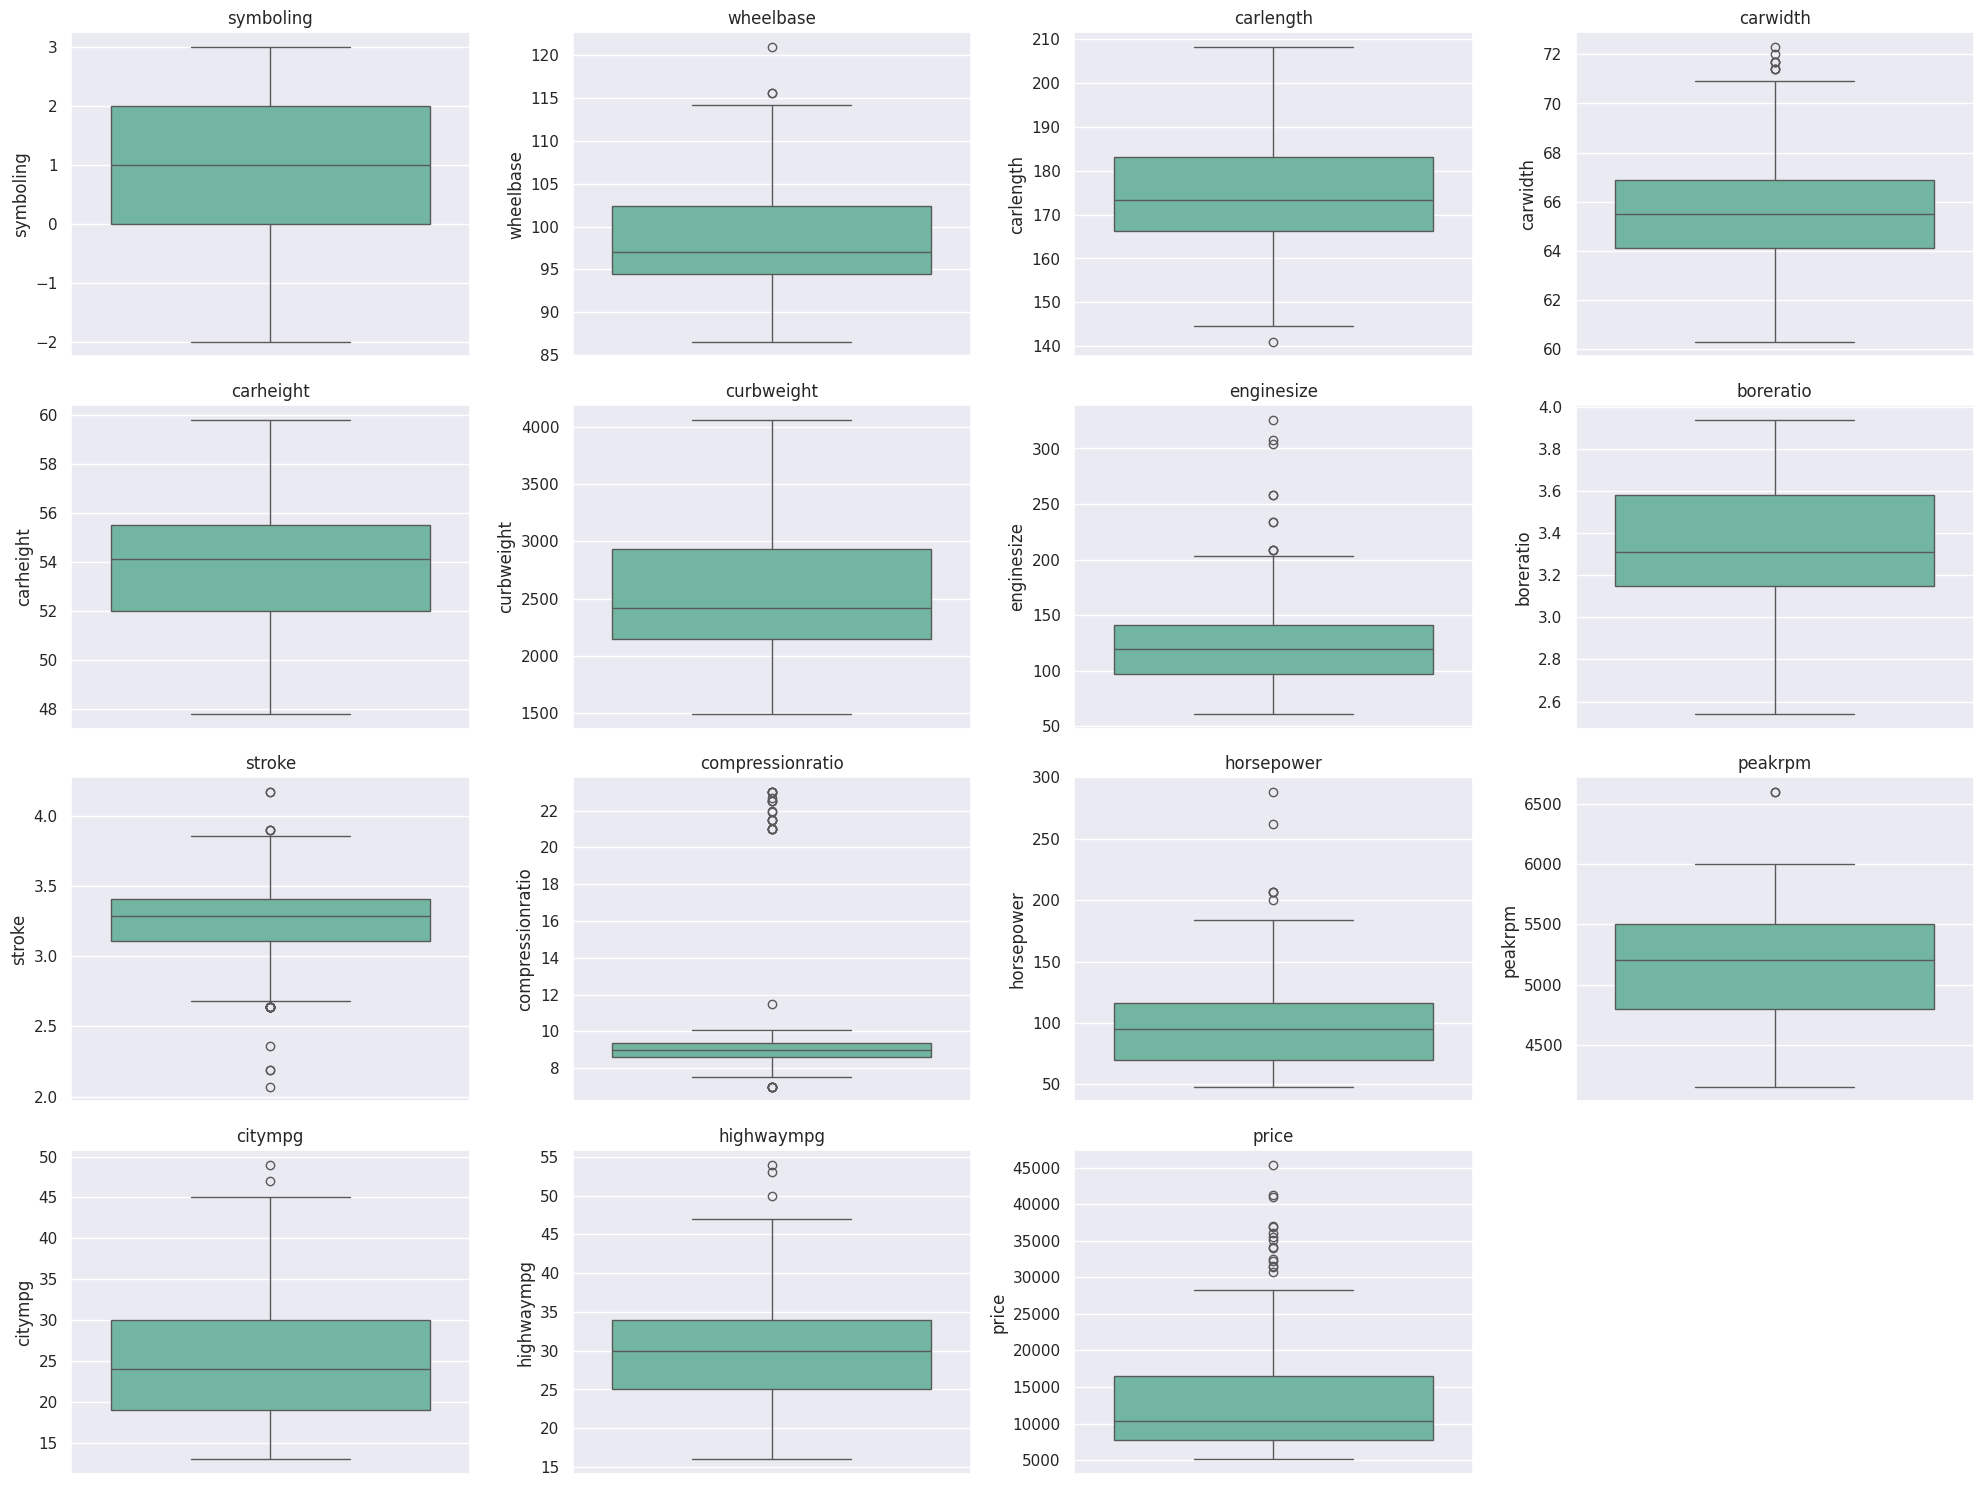

In [168]:
num_cols = [
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'
]

# boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [169]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap values at lower and upper bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function
df_clean = cap_outliers_iqr(df_clean, num_cols)

In [170]:

df_clean.shape

(205, 25)

In [171]:
df.shape

(205, 26)

# Cleaning 'enginetype'

In [172]:
df_clean['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [173]:
df_clean['enginetype'].value_counts()

,count
enginetype,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


In [174]:
df_clean['enginetype'] = df_clean['enginetype'].replace({'rotor':'other', 'dohcv':'other'})

# Cleaning 'cylindernumber'

In [175]:
df_clean['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [176]:
mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df_clean['cylindernumber'] = df_clean['cylindernumber'].map(mapping)

In [177]:
df_clean['cylindernumber'].dtype

dtype('int64')

#Explore & clean 'fuelsystem'

In [178]:
df_clean['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [179]:
df_clean['fuelsystem'].value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [180]:
rare_values = ['4bbl', 'mfi', 'spfi']
df_clean['fuelsystem'] = df_clean['fuelsystem'].replace(rare_values, 'other')

In [181]:
df_clean['fuelsystem'].value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
other,5


# **Data Visualization**

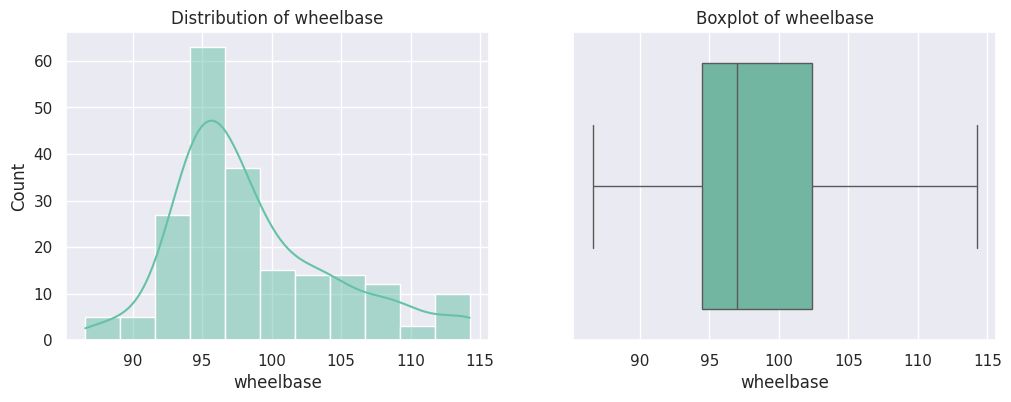

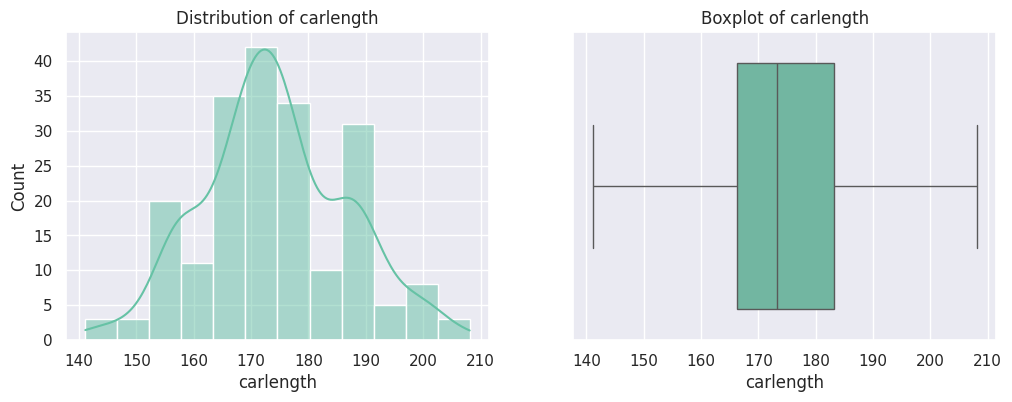

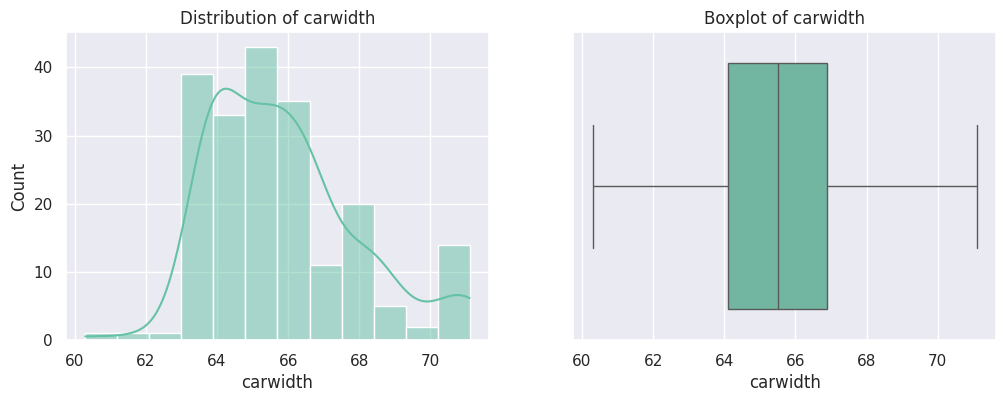

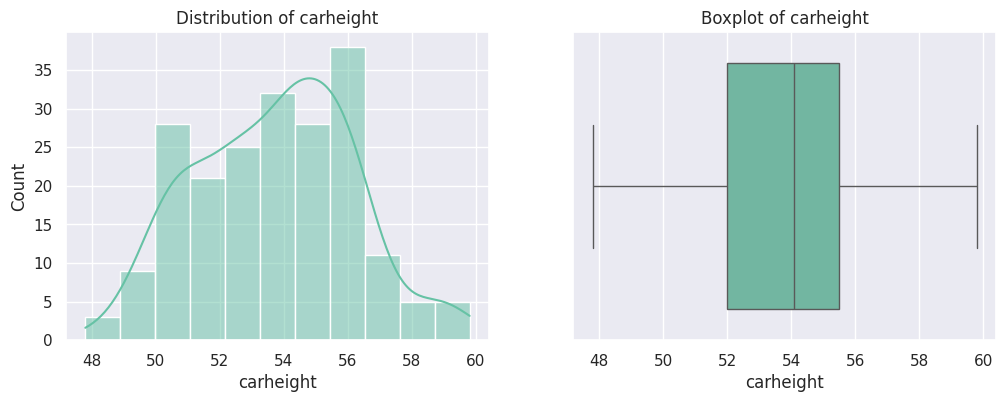

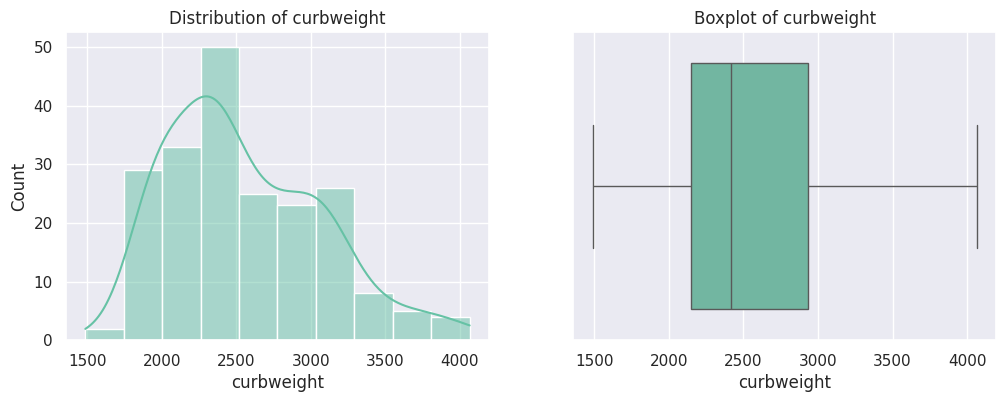

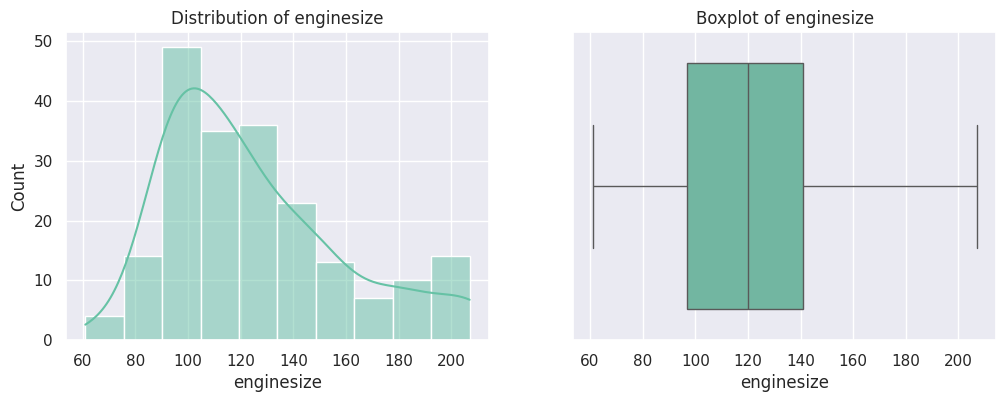

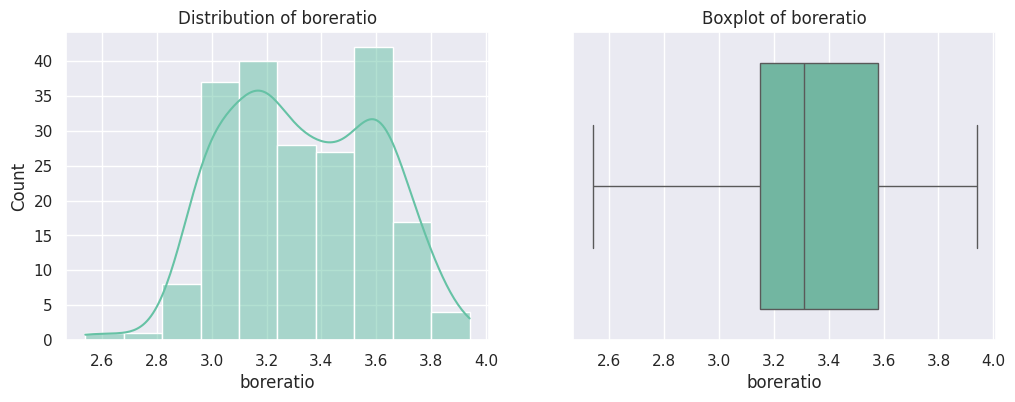

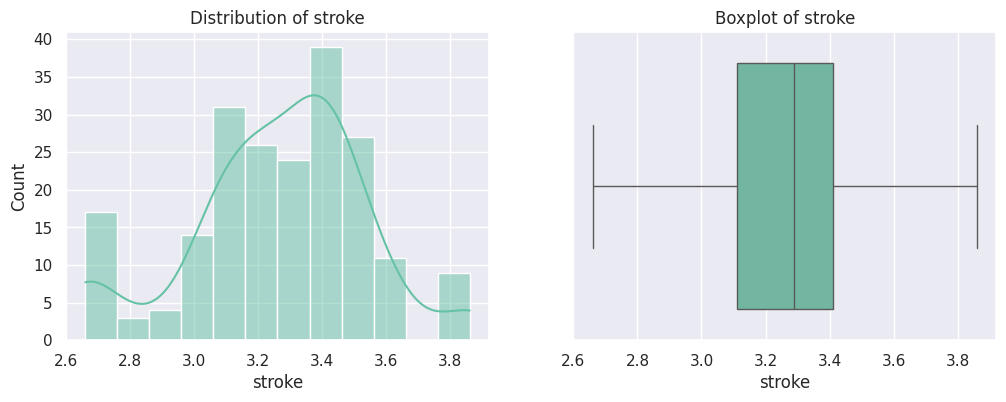

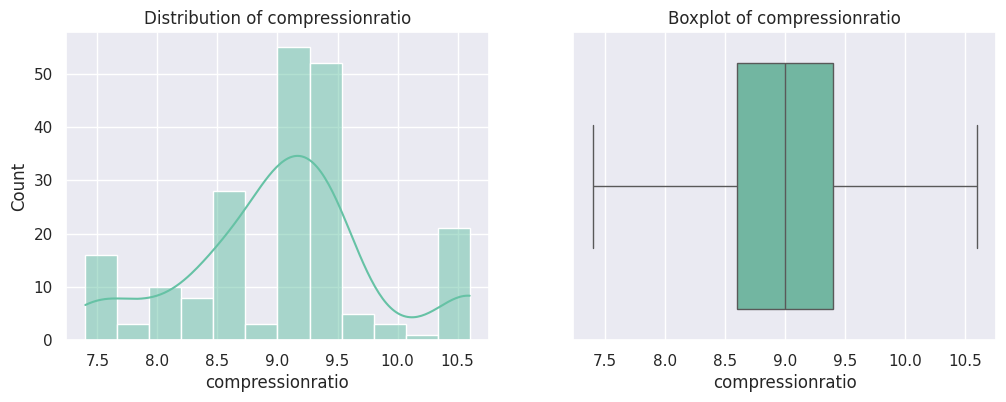

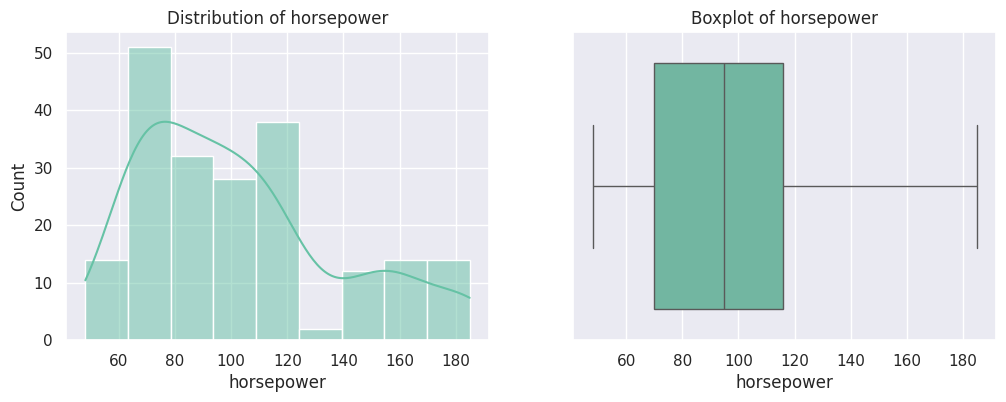

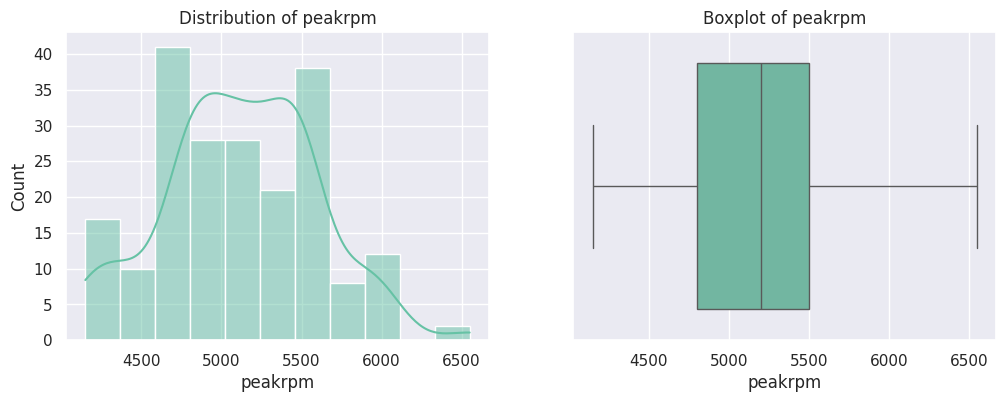

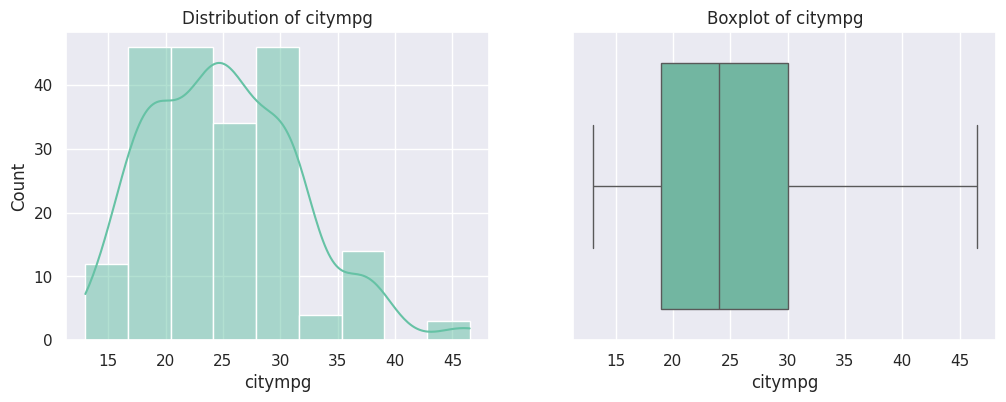

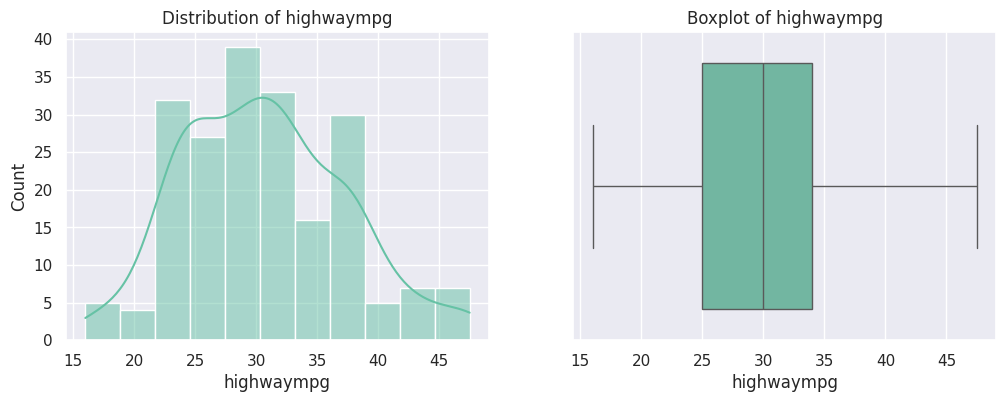

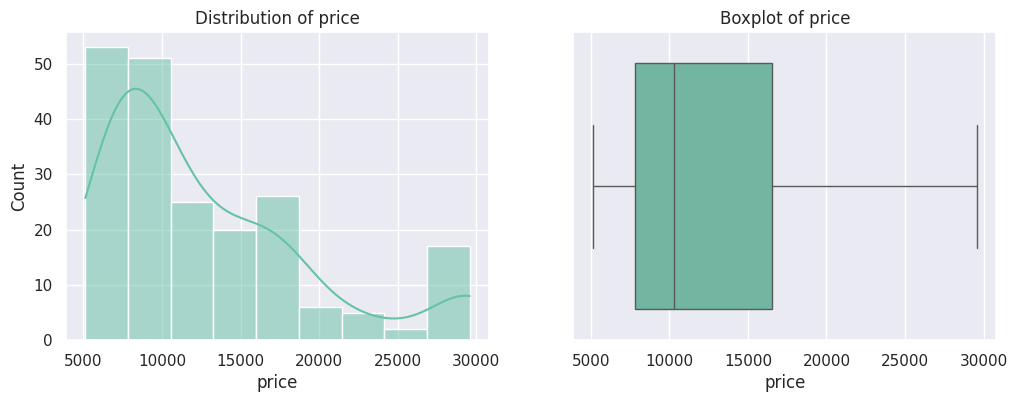

In [182]:
df_viz=df_clean.copy()
plt.rcParams["figure.figsize"] = (10,6)

# distribution of numerical columns
numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight',
                'curbweight', 'enginesize', 'boreratio', 'stroke',
                'compressionratio', 'horsepower', 'peakrpm',
                'citympg', 'highwaympg', 'price']

for col in numeric_cols:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df_viz[col], kde=True, ax=ax[0])
    ax[0].set_title(f"Distribution of {col}")
    sns.boxplot(x=df_viz[col], ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")
    plt.show()


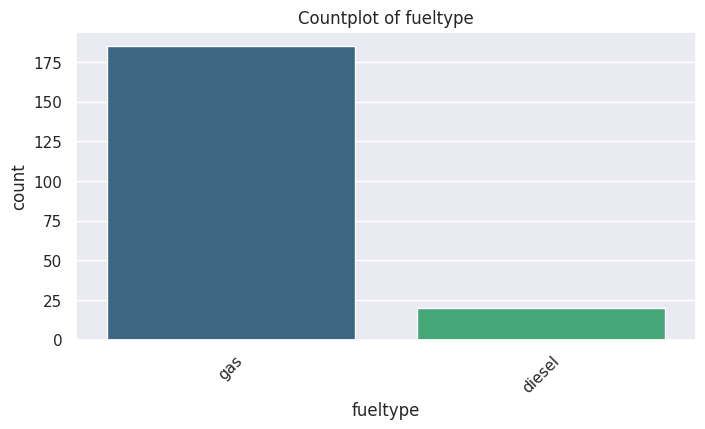

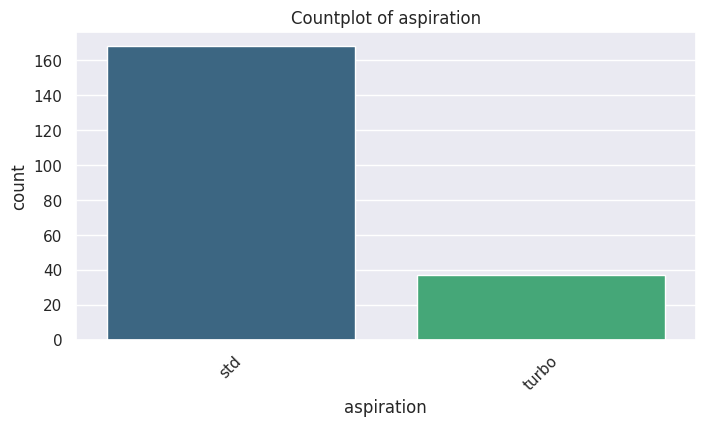

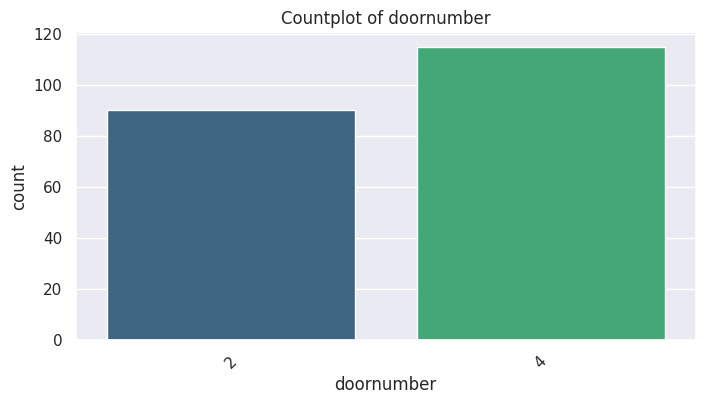

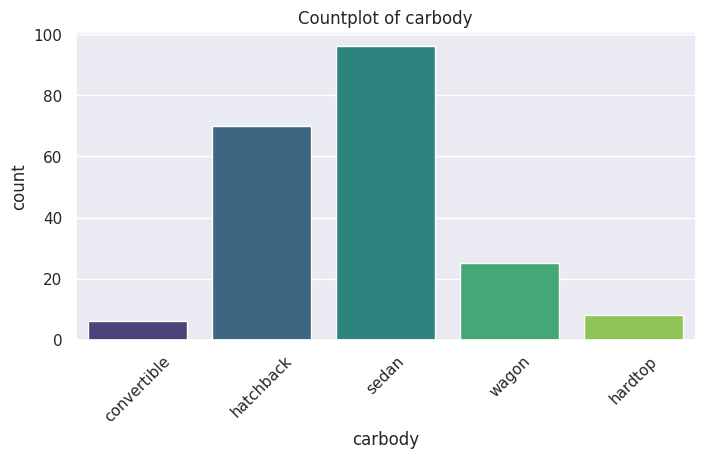

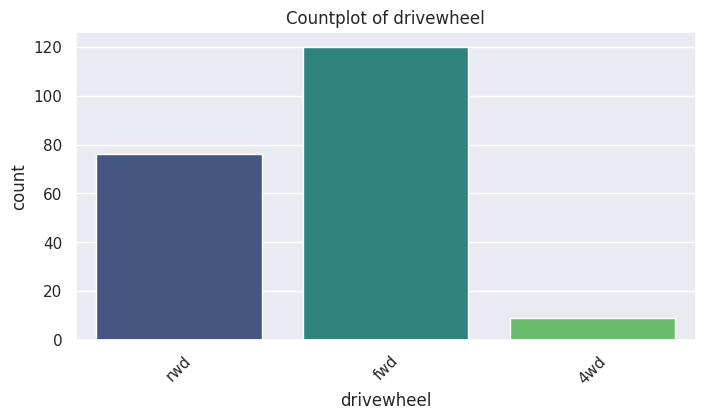

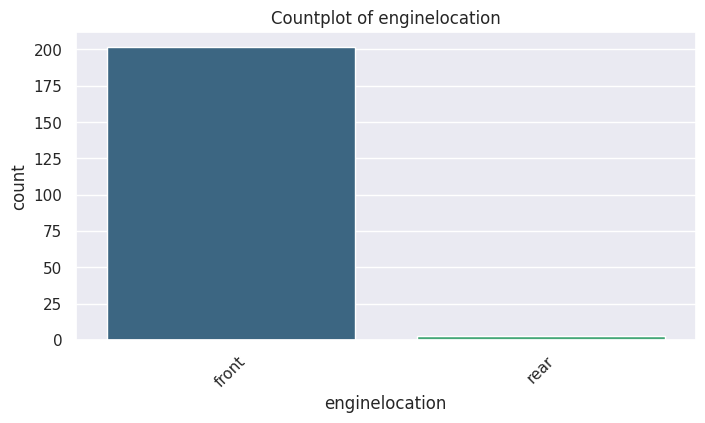

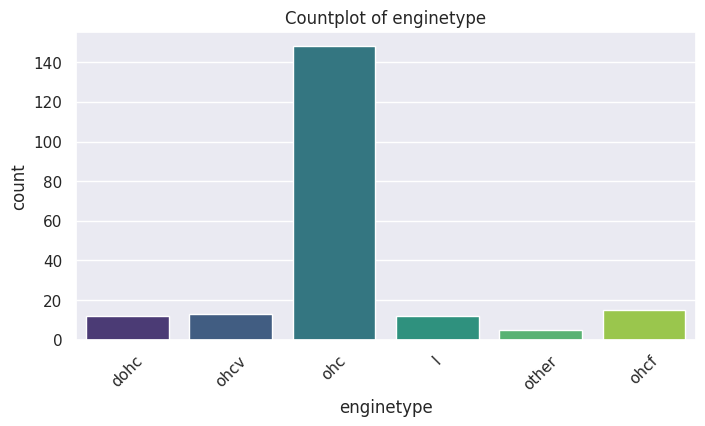

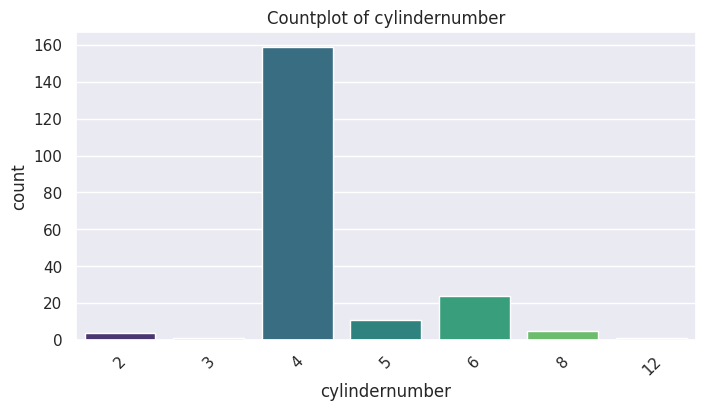

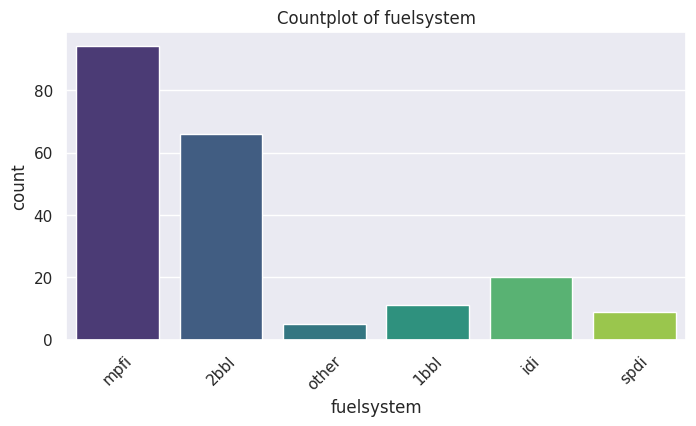

In [183]:
# categorical columns
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype',
                    'cylindernumber', 'fuelsystem']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df_viz[col], palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

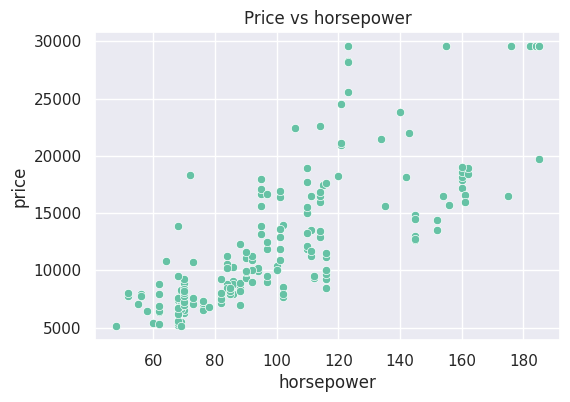

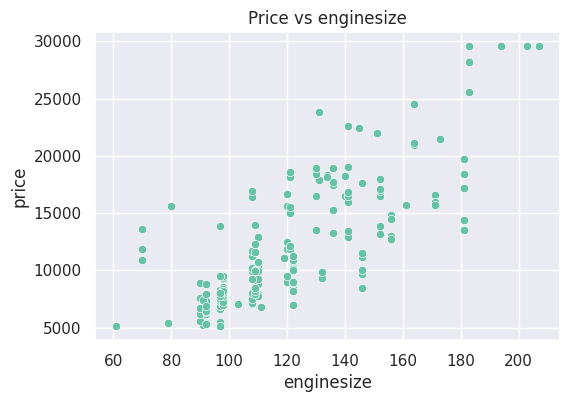

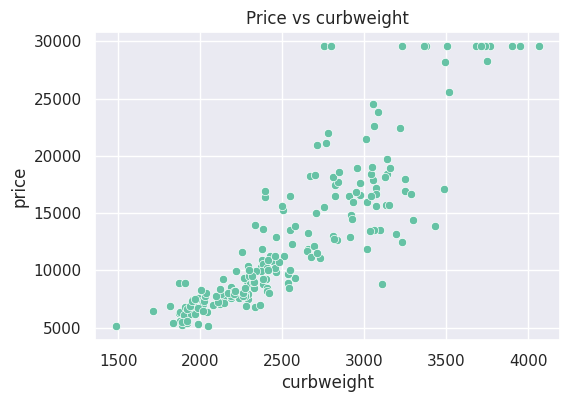

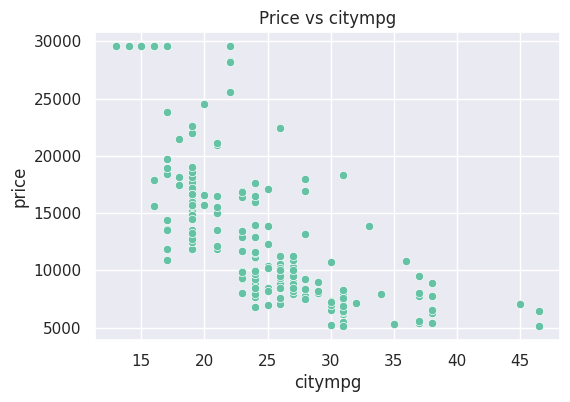

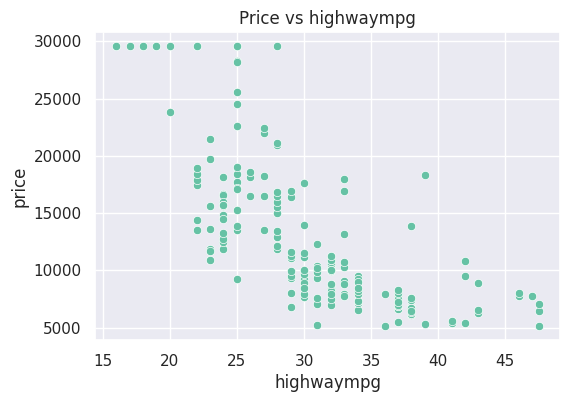

In [184]:
# relations with the price- Scatterplots
cols_to_check = ['horsepower', 'enginesize', 'curbweight', 'citympg', 'highwaympg']
for col in cols_to_check:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_viz[col], y=df_viz['price'])
    plt.title(f"Price vs {col}")
    plt.show()


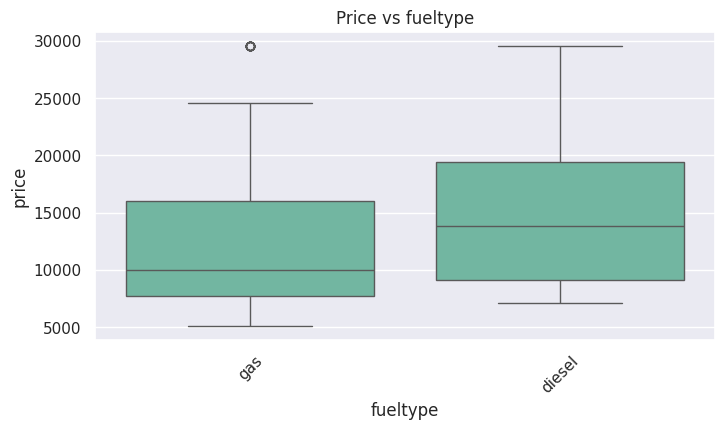

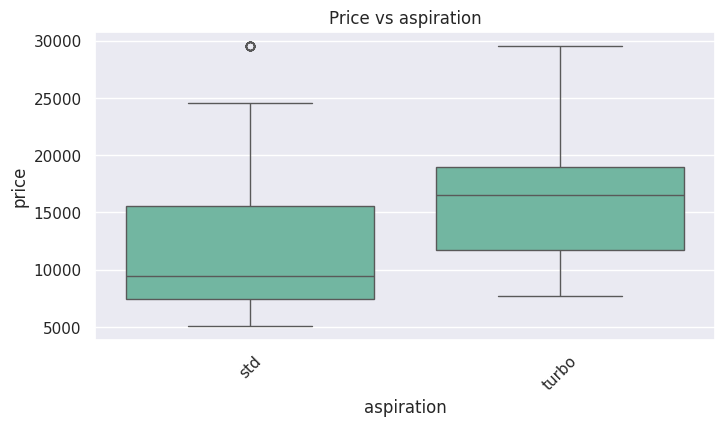

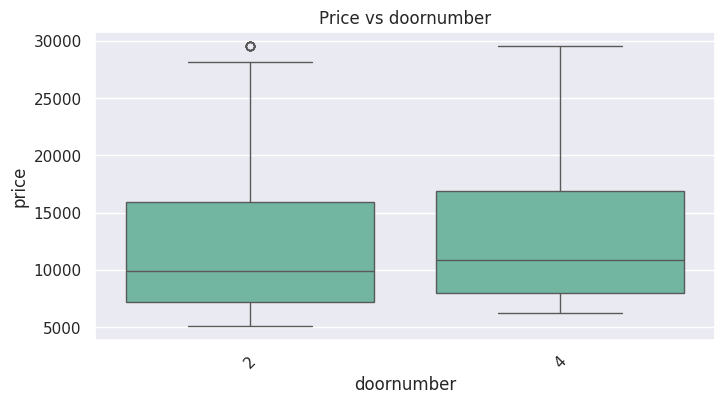

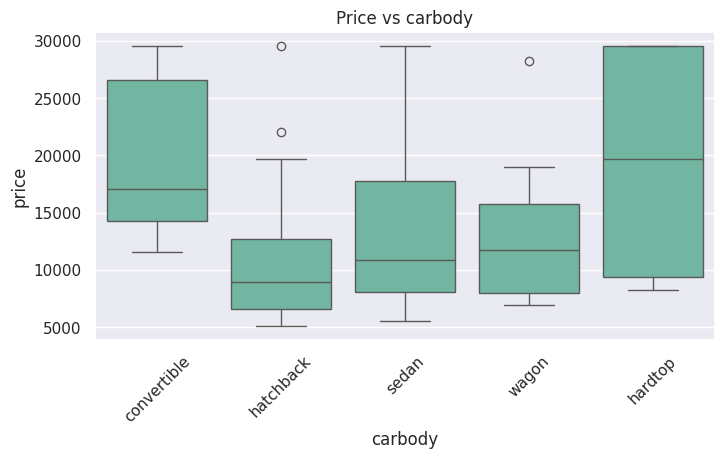

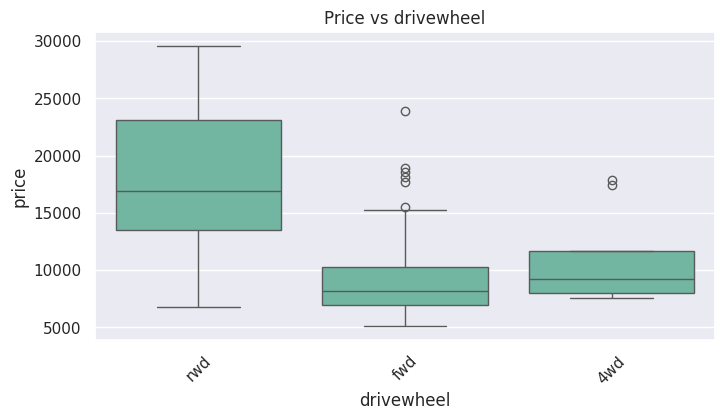

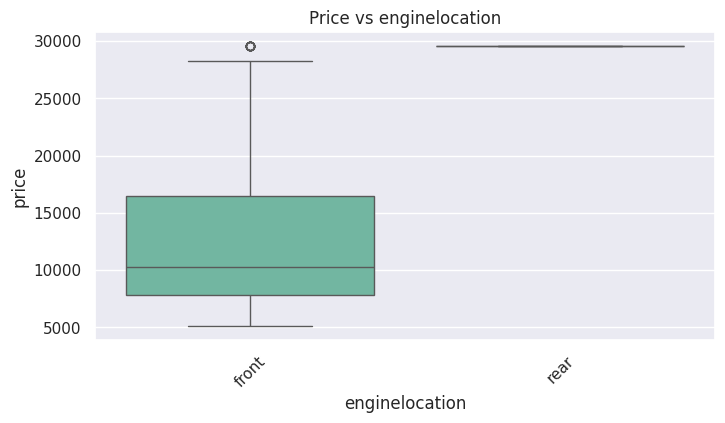

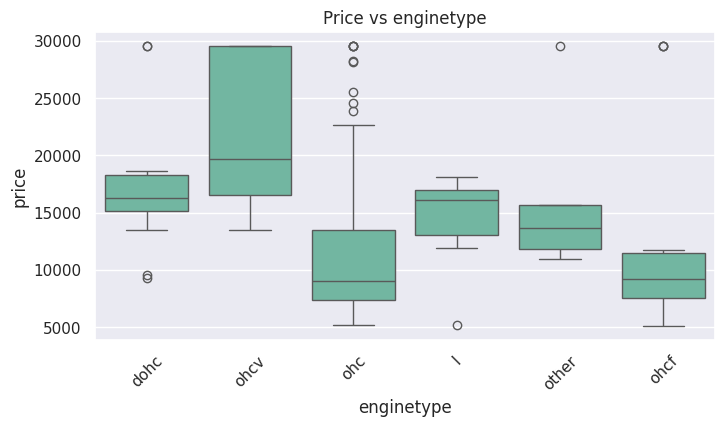

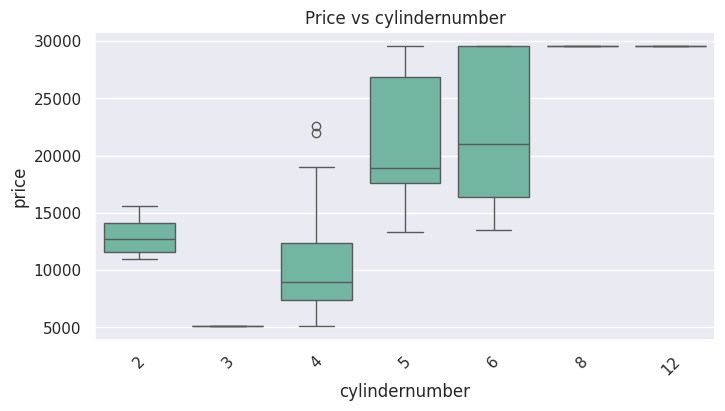

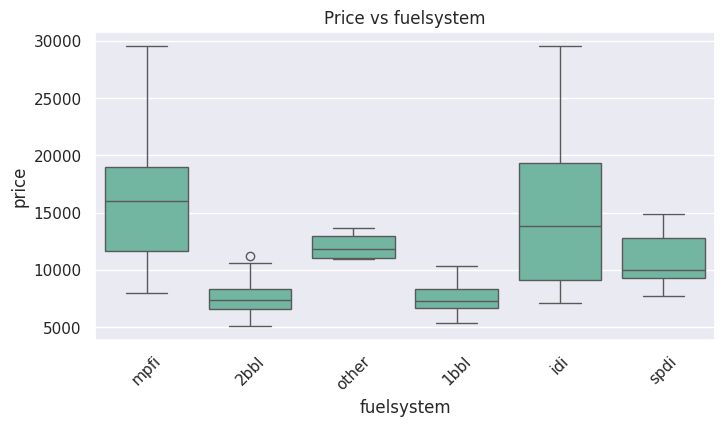

In [185]:
# relations with the price- Boxplots for categories
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_viz[col], y=df_viz['price'])
    plt.title(f"Price vs {col}")
    plt.xticks(rotation=45)
    plt.show()

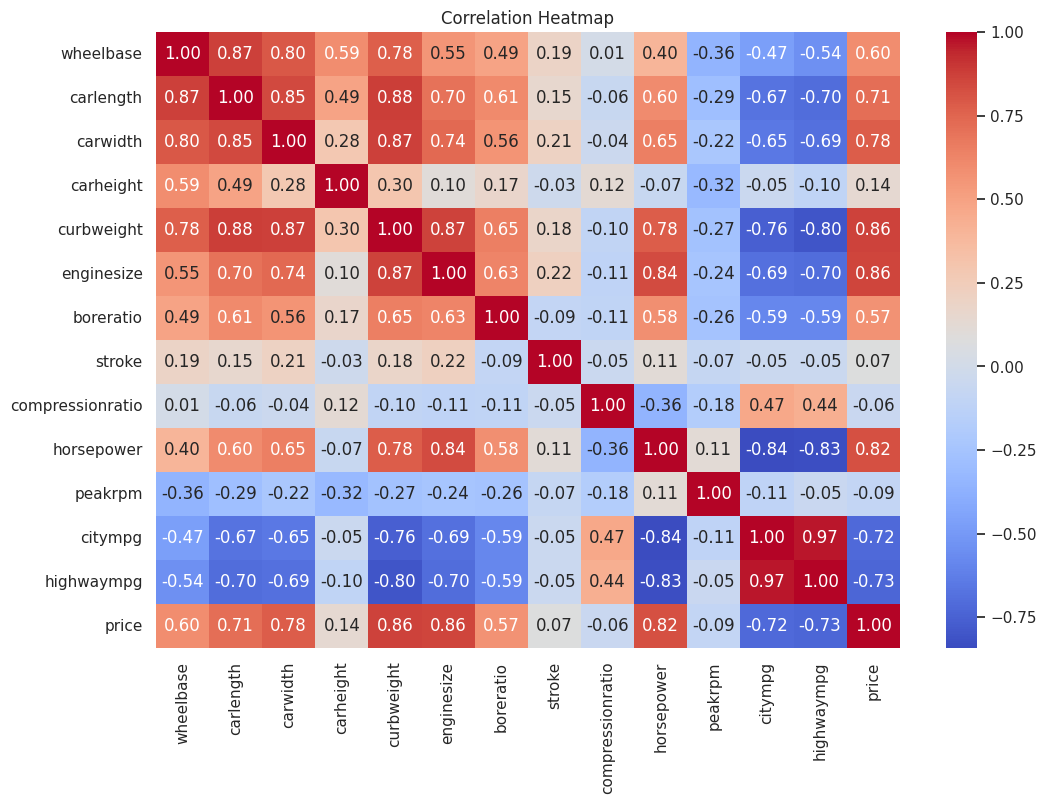

In [186]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df_viz[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 📊 Data Exploration & Visualization Report

## 1. Dataset Overview
- The dataset contains **205 rows and 26 columns**, describing various car specifications and their corresponding prices.  
- Features include:  
  - **Categorical**: `fueltype`, `aspiration`, `doornumber`, `carbody`, `drivewheel`, `enginelocation`, `enginetype`, `cylindernumber`, `fuelsystem`.  
  - **Numerical**: `wheelbase`, `carlength`, `carwidth`, `carheight`, `curbweight`, `enginesize`, `boreratio`, `stroke`, `compressionratio`, `horsepower`, `peakrpm`, `citympg`, `highwaympg`, `price`.  

---

## 2. Initial Observations
- The target variable is **`price`**.  
- Some outliers exist in `price` and `horsepower`, but they are not extreme and can be kept for modeling.  
- Certain categorical variables contain very rare categories (e.g., some `enginetype` and `fuelsystem` values). These can be grouped into an **“Other”** category.  

---

## 3. Categorical Variables
- **Boxplots with price** show:  
  - Cars with **two doors** tend to be cheaper compared to four-door cars.  
  - **Diesel cars** are generally cheaper than petrol cars.  
  - **Hatchback** cars are usually cheaper than **sedans** and **wagons**.  

- **Countplots** highlight:  
  - Most cars have either two or four doors.  
  - The majority of cars use the **ohc** engine type.  

---

## 4. Correlation Heatmap Insights
- Strong **positive correlations with price**:  
  - `curbweight` (0.84) → heavier cars are more expensive.  
  - `enginesize` (0.87) → larger engine size strongly increases price.  
  - `horsepower` (0.81) → more powerful cars are pricier.  
  - `carwidth` (0.76) → wider cars tend to cost more.  

- Strong **negative correlations with price**:  
  - `citympg` (-0.69) and `highwaympg` (-0.70) → fuel-efficient cars are usually cheaper.  
  - `peakrpm` (-0.09, very weak) → has little to no effect on price.  
  - `carheight` (0.12, weak positive) → not a strong indicator of price.  

- **Inter-feature correlations**:  
  - `citympg` and `highwaympg` are almost identical (0.97 correlation).  
  - `enginesize`, `horsepower`, and `curbweight` are highly correlated → multicollinearity needs to be handled.  
  - `carlength`, `wheelbase`, and `carwidth` are also strongly correlated.  

---

## 5. Conclusions
- The most influential predictors of car price are likely:  
  `enginesize`, `curbweight`, `horsepower`, `carwidth`, `carlength`, `wheelbase`.  
- Less important features: `carheight`, `peakrpm`, `stroke`, `compressionratio`.  
- Some features are redundant due to very high correlation (e.g., `citympg` vs `highwaympg`).  
- Categorical variables (`carbody`, `doornumber`, `fueltype`) also show meaningful patterns and should be included in feature engineering.  


# **Feature Engineering**

In [187]:
df_fe=df_clean.copy()

In [188]:
# Create a new column 'avg_mpg' which is the average of citympg and highwaympg
df_fe['avg_mpg'] = (df_fe['citympg'] + df_fe['highwaympg']) / 2
# Drop original mpg columns (to reduce multicollinearity)
df_fe.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [189]:
#using map For binary categorical columns 'fueltype', 'aspiration'
binary_cols = ['fueltype', 'aspiration']  # update with your dataset
for col in binary_cols:
    df_fe[col] = df_fe[col].map({'gas':0, 'diesel':1, 'std':0, 'turbo':1})

In [190]:
#Using one-hot encoding For other categorical columns with multiple categories
multi_cat_cols = ['carbody', 'drivewheel', 'enginelocation', 'enginetype','fuelsystem']
df_fe = pd.get_dummies(df_fe, columns=multi_cat_cols, drop_first=True)

In [191]:
# Feature ratios
df_fe['length_width_ratio'] = df_fe['carlength'] / df_fe['carwidth']
df_fe['weight_power_ratio'] = df_fe['curbweight'] / df_fe['horsepower']
df_fe['engine_per_cylinder'] = df_fe['enginesize'] / df_fe['cylindernumber']
df_fe['weight_engine_ratio'] = df_fe['curbweight'] / df_fe['enginesize']
df_fe['power_engine_ratio'] = df_fe['horsepower'] / df_fe['enginesize']

In [192]:
df_fe.dtypes

,0
symboling,int64
fueltype,int64
aspiration,int64
doornumber,int64
wheelbase,float64
carlength,float64
carwidth,float64
carheight,float64
curbweight,int64
cylindernumber,int64


In [193]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
carbrand_encoded = encoder.fit_transform(df_fe[['CarBrand']])
encoded_df = pd.DataFrame(carbrand_encoded, columns=encoder.get_feature_names_out(['CarBrand']))
df_fe = pd.concat([df_fe.drop('CarBrand', axis=1), encoded_df], axis=1)

##Feature Engineering Notes
- Created **feature ratios** to reduce multicollinearity:  
  - `length_width_ratio = carlength / carwidth`  
  - `weight_power_ratio = curbweight / horsepower`  
  - `engine_per_cylinder = enginesize / cylindernumber`  
- Encoded categorical variables using **One-Hot Encoding** or **Label Encoding** as needed.

# **Modeling**

**Split & Scaling**

In [194]:
df_mod=df_fe.copy()

In [195]:
# Separate features from the target column
X = df_mod.drop('price', axis=1)
y = df_mod['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling: standardize the feature values
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

**Linear Regression**

In [196]:
# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("R2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R2 Score: 0.9047210754707016
RMSE: 2246.361808111926


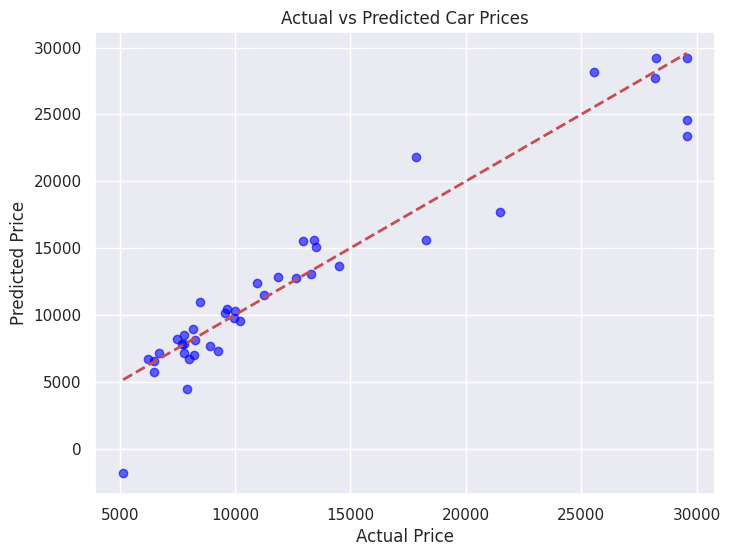

In [197]:
# Scatter plot: True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Line y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


**Ridge Regression**

In [198]:
# Ridge Regression with GridSearchCV

ridge = Ridge()

# Define hyperparameter grid for Ridge
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 50.0]  # regularization strength
}

# GridSearchCV setup
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

# Train the GridSearch
ridge_grid.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Ridge alpha:", ridge_grid.best_params_)

# Predict and evaluate
y_pred_ridge = ridge_grid.predict(X_test_scaled)
print("R2 Score (Ridge):", r2_score(y_test, y_pred_ridge))
print("RMSE (Ridge):", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Best Ridge alpha: {'alpha': 10.0}
R2 Score (Ridge): 0.9310236991714561
RMSE (Ridge): 1911.3104461261598


**Random Forest**

In [199]:
# Random Forest Regressor with GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Train the GridSearch
rf_grid.fit(X_train, y_train)

# Best hyperparameters
print("Best Random Forest params:", rf_grid.best_params_)

# Predict and evaluate
y_pred_rf = rf_grid.predict(X_test)
print("R2 Score (Random Forest):", r2_score(y_test, y_pred_rf))
print("RMSE (Random Forest):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Best Random Forest params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score (Random Forest): 0.9577652816692707
RMSE (Random Forest): 1495.602163366322


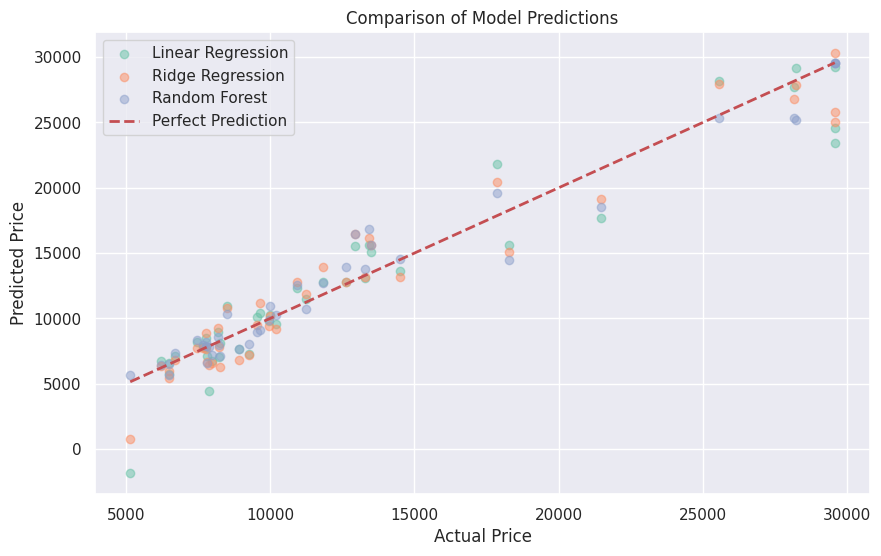

In [200]:
plt.figure(figsize=(10,6))

# Scatter plots for each model
plt.scatter(y_test, model.predict(X_test_scaled), alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparison of Model Predictions")
plt.legend()
plt.show()

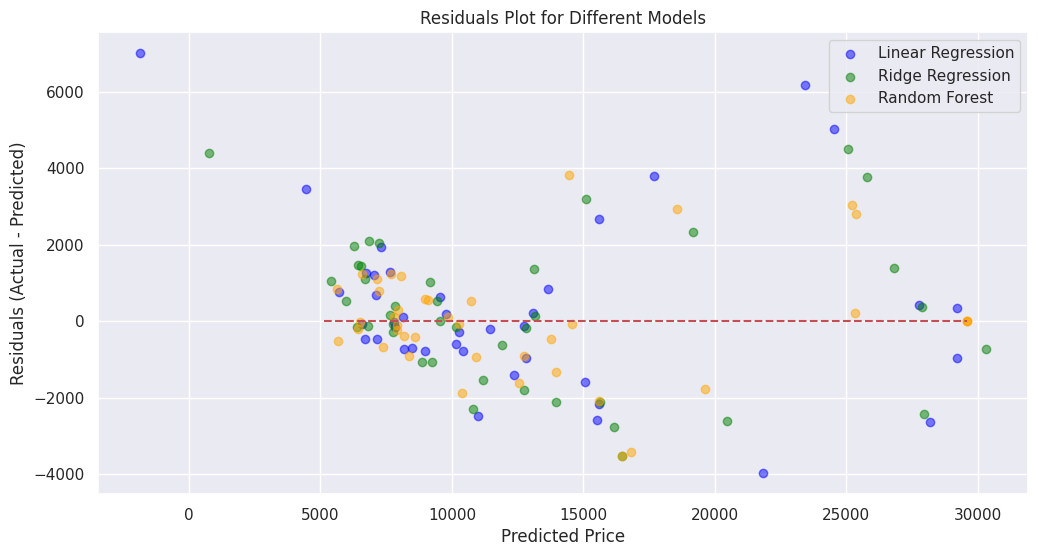

In [201]:
residuals_lr = y_test - model.predict(X_test_scaled)
residuals_ridge = y_test - y_pred_ridge
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12,6))

# Linear Regression residuals
plt.scatter(model.predict(X_test_scaled), residuals_lr, alpha=0.5, label='Linear Regression', color='blue')
# Ridge Regression residuals
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5, label='Ridge Regression', color='green')
# Random Forest residuals
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, label='Random Forest', color='orange')

plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')  # خط الصفر
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot for Different Models")
plt.legend()
plt.show()

# **Final Conclusions**

1. Data preprocessing and feature engineering (ratios, encoding categorical variables) significantly improved model performance.

2. Linear Regression (baseline):
   - R² ≈ 0.905, RMSE ≈ 2246
   - Good starting point, but limited in capturing complex relationships.

3. Ridge Regression (with GridSearchCV):
   - Best alpha = 10.0
   - R² ≈ 0.931, RMSE ≈ 1911
   - Regularization reduced overfitting and improved predictions.

4. Random Forest Regressor (with GridSearchCV):
   - Best parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}
   - R² ≈ 0.958, RMSE ≈ 1496
   - Handles non-linear relationships best and gives the lowest prediction error.

5. Visualizations (Actual vs Predicted + Residuals):
   - Random Forest shows the tightest fit and most evenly distributed residuals.
   - Linear models (Linear & Ridge) perform well but show larger errors for extreme values.

**Conclusion:**
- Random Forest is the most accurate and reliable model for car price prediction in this dataset.
- Ridge Regression is a strong linear alternative.
- Visualizations confirm the superiority of tree-based modeling in capturing complex patterns.
